image processing and feature extraction takes 621 seconds


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f09f72c3e20>
Traceback (most recent call last):
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Correct recognition rate (%)
Similartiy measure           Original feature set    Reduced feature set
-------------------------  ----------------------  ---------------------
L1 distance measure                       88.1944                89.3519
L2 distance measure                       84.9537                90.2778
Cosine similarity measure                 85.4167                92.3611


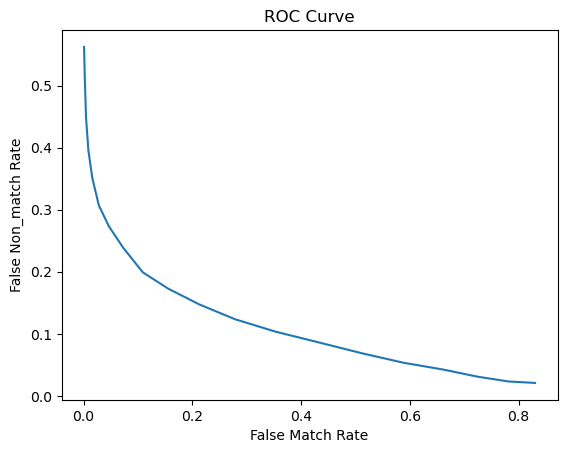

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f09f47072e0>
Traceback (most recent call last):
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

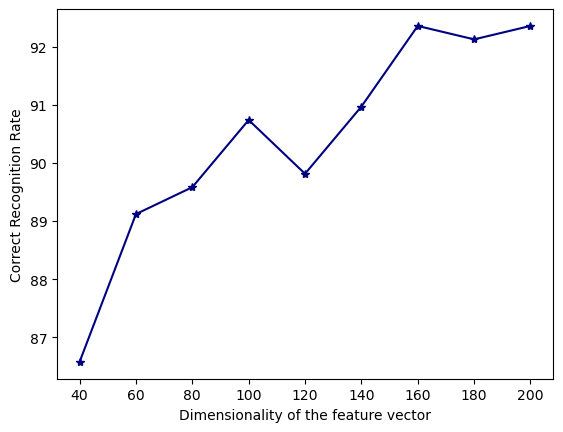

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f09f7336170>
Traceback (most recent call last):
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Bootsrap takes2559seconds
False Match and False Nonmatch Rates with Different Threshold Values
  Threshold  False match rate(%)                                         False non-match rate(%)
-----------  ----------------------------------------------------------  --------------------------------------------------------
       0.74  0.5517768547363562[0.47868351217260874,0.6259374639436945]  22.37345679012346[18.503086419753085,25.941358024691358]
       0.76  1.1668974270220374[1.0470751124956732,1.2693261797623168]   19.762345679012352[16.03395061728395,23.472222222222218]
       0.78  2.469251182646823[2.3132283373716396,2.6054286373601014]    18.32098765432099[14.506172839506174,22.23765432098765]


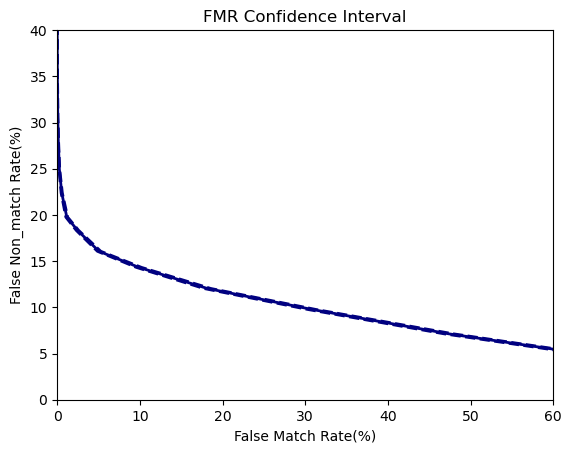

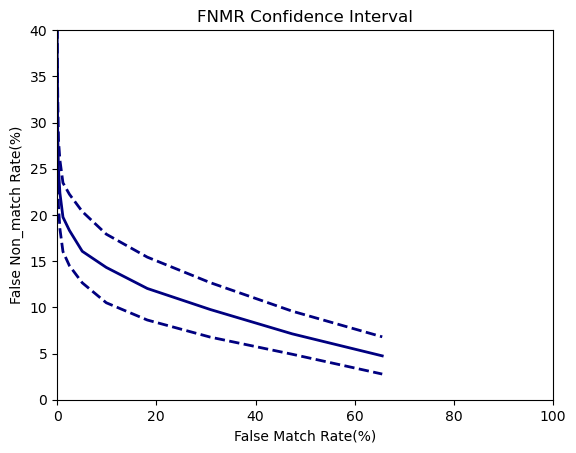

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
import cv2
from IrisLocalization import IrisLocalization
from IrisNormalization import IrisNormalization
from ImageEnhancement import ImageEnhancement
from FeatureExtraction import FeatureExtraction
import IrisMatching as IM
import PerformanceEvaluation as PE
import datetime

rootpath = "./CASIA Iris Image Database (version 1.0)/"

train_features = np.zeros((324,1536))
train_classes = np.zeros(324, dtype = np.uint8)
test_features = np.zeros((432,1536))
test_classes = np.zeros(432, dtype = np.uint8)

starttime = datetime.datetime.now()

for i in range(1,109):
    filespath = rootpath + str(i).zfill(3)
    trainpath = filespath + "/1/"
    testpath = filespath + "/2/"
    for j in range(1,4):
        irispath = trainpath + str(i).zfill(3) + "_1_" + str(j) + ".bmp"
        img = cv2.imread(irispath, 0)
        iris, pupil = IrisLocalization(img)
        normalized = IrisNormalization(img, pupil, iris)
        ROI = ImageEnhancement(normalized)
        train_features[(i-1)*3+j-1, :] = FeatureExtraction(ROI)
        train_classes[(i-1)*3+j-1] = i
    for k in range(1,5):
        irispath = testpath + str(i).zfill(3) + "_2_" + str(k) + ".bmp"
        img = cv2.imread(irispath, 0)
        iris, pupil = IrisLocalization(img)
        normalized = IrisNormalization(img, pupil, iris)
        ROI = ImageEnhancement(normalized)
        test_features[(i-1)*4+k-1, :] = FeatureExtraction(ROI)
        test_classes[(i-1)*4+k-1] = i

endtime = datetime.datetime.now()

print('image processing and feature extraction takes '+str((endtime-starttime).seconds)+' seconds')


PE.table_CRR(train_features, train_classes, test_features, test_classes)
PE.performance_evaluation(train_features, train_classes, test_features, test_classes)
#thresholds_2=[0.74,0.76,0.78]


# this part is for bootsrap
starttime = datetime.datetime.now() 
thresholds_3=np.arange(0.6,0.9,0.02)
times = 100 #running 100 times takes about 1 to 2 hours
total_fmrs, total_fnmrs, crr_mean, crr_u, crr_l = IM.IrisMatchingBootstrap(train_features, train_classes, test_features, test_classes,times,thresholds_3)
fmrs_mean,fmrs_l,fmrs_u,fnmrs_mean,fnmrs_l,fnmrs_u = IM.calcROCBootstrap(total_fmrs, total_fnmrs)

endtime = datetime.datetime.now()

print('Bootsrap takes'+str((endtime-starttime).seconds) + 'seconds')

fmrs_mean *= 100  #use for percent(%)
fmrs_l *= 100
fmrs_u *= 100
fnmrs_mean *= 100
fnmrs_l *= 100
fnmrs_u *= 100
PE.FM_FNM_table(fmrs_mean,fmrs_l,fmrs_u,fnmrs_mean,fnmrs_l,fnmrs_u, thresholds_3)
PE.FMR_conf(fmrs_mean,fmrs_l,fmrs_u,fnmrs_mean,fnmrs_l,fnmrs_u)
PE.FNMR_conf(fmrs_mean,fmrs_l,fmrs_u,fnmrs_mean,fnmrs_l,fnmrs_u)